# Solar cell cark current

The goal of this notebook is to check the wave form on the dark current when adding a cache on the solar cell.

In [14]:
import os, sys
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits

from solarcell_dataset import SolarCellDataSet, SolarCellRun, calculate_npulses, get_info_from_filename, estimate_noise, get_solarcell_total_charge
%matplotlib notebook

/home/jneveu/stardice/analysis/cbp_paper


In [5]:
datapath="/data/STARDICE/cbp/solarcell/ut20210720/DarkCurrent"
%ls {datapath}

LaserBurstTimes_Wave350_QSWMax.csv*
LaserBurstTimes_Wave450_QSWMax.csv*
LaserBurstTimes_Wave550_QSWMax.csv*
LaserBurstTimes_Wave650_QSWMax.csv*
LaserBurstTimes_Wave700_QSWMax.csv*
LaserBurstTimes_Wave750_QSWMax.csv*
LaserBurstTimes_Wave850_QSWMax.csv*
LaserBurstTimes_Wave950_QSWMax.csv*
Photodiode_fromKeithley_Wave350_QSWMax.csv*
Photodiode_fromKeithley_Wave450_QSWMax.csv*
Photodiode_fromKeithley_Wave550_QSWMax.csv*
Photodiode_fromKeithley_Wave650_QSWMax.csv*
Photodiode_fromKeithley_Wave700_QSWMax.csv*
Photodiode_fromKeithley_Wave750_QSWMax.csv*
Photodiode_fromKeithley_Wave850_QSWMax.csv*
Photodiode_fromKeithley_Wave950_QSWMax.csv*
QSWMax_dark_current_ntuple.npy
SolarCell_fromB2987A_Wave350_QSWMax.csv*
SolarCell_fromB2987A_Wave450_QSWMax.csv*
SolarCell_fromB2987A_Wave550_QSWMax.csv*
SolarCell_fromB2987A_Wave650_QSWMax.csv*
SolarCell_fromB2987A_Wave700_QSWMax.csv*
SolarCell_fromB2987A_Wave750_QSWMax.csv*
SolarCell_fromB2987A_Wave850_QSWMax.csv*
SolarCell_fromB2987A_Wave950_QSWMax.csv*


In [10]:
nbursts = 5

run = SolarCellRun(directory_path=datapath, nbursts=nbursts)
run.load_from_file(os.path.join(datapath, f"QSWMax_dark_current_ntuple.npy"))
run.load()

100%|██████████| 8/8 [00:00<00:00, 21.43it/s]


In [19]:
d = run.get_data_set(650, 5)

<IPython.core.display.Javascript object>


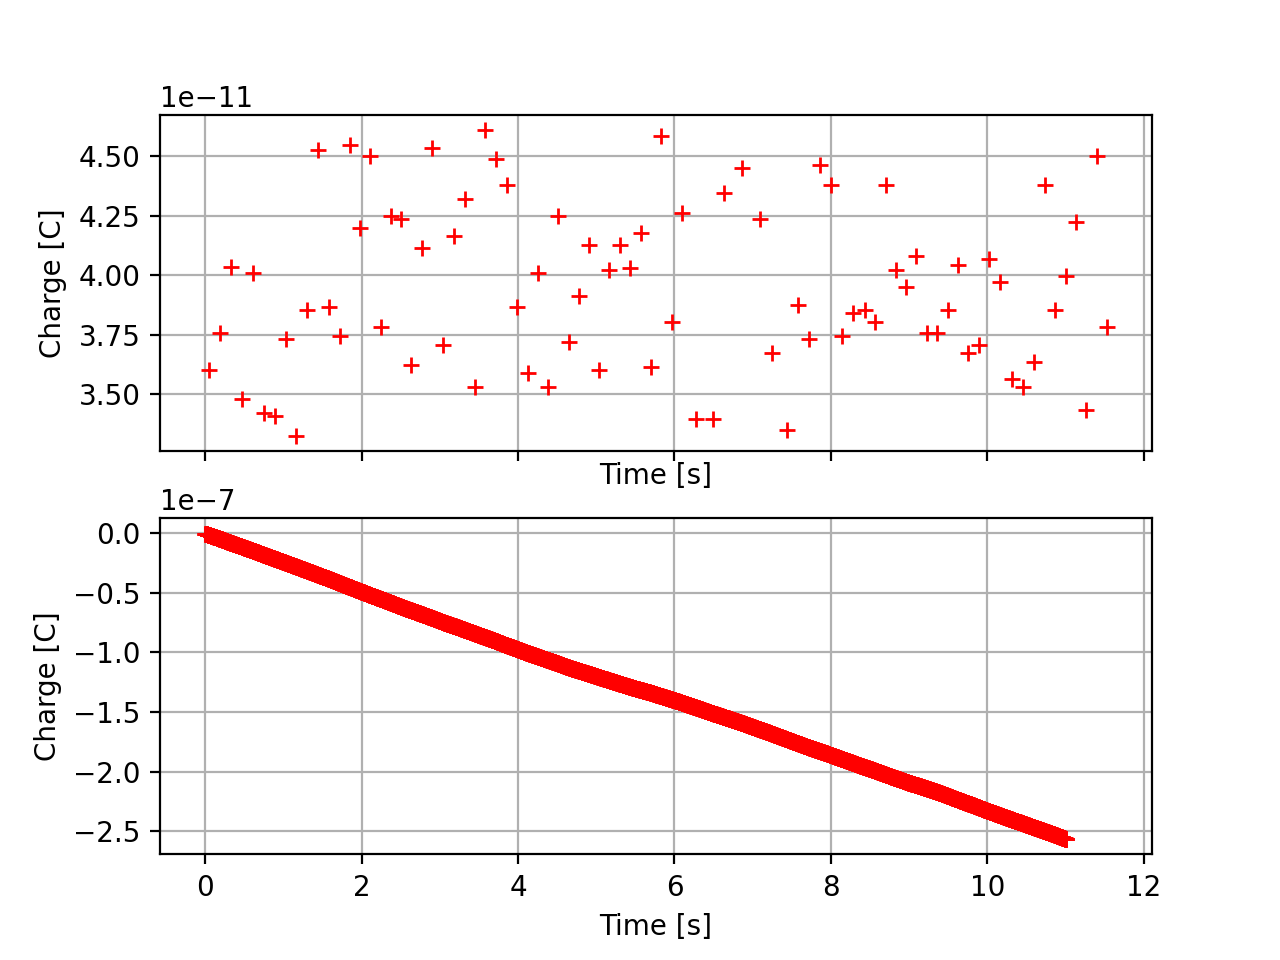

In [20]:
d.plot_data_set()

<IPython.core.display.Javascript object>


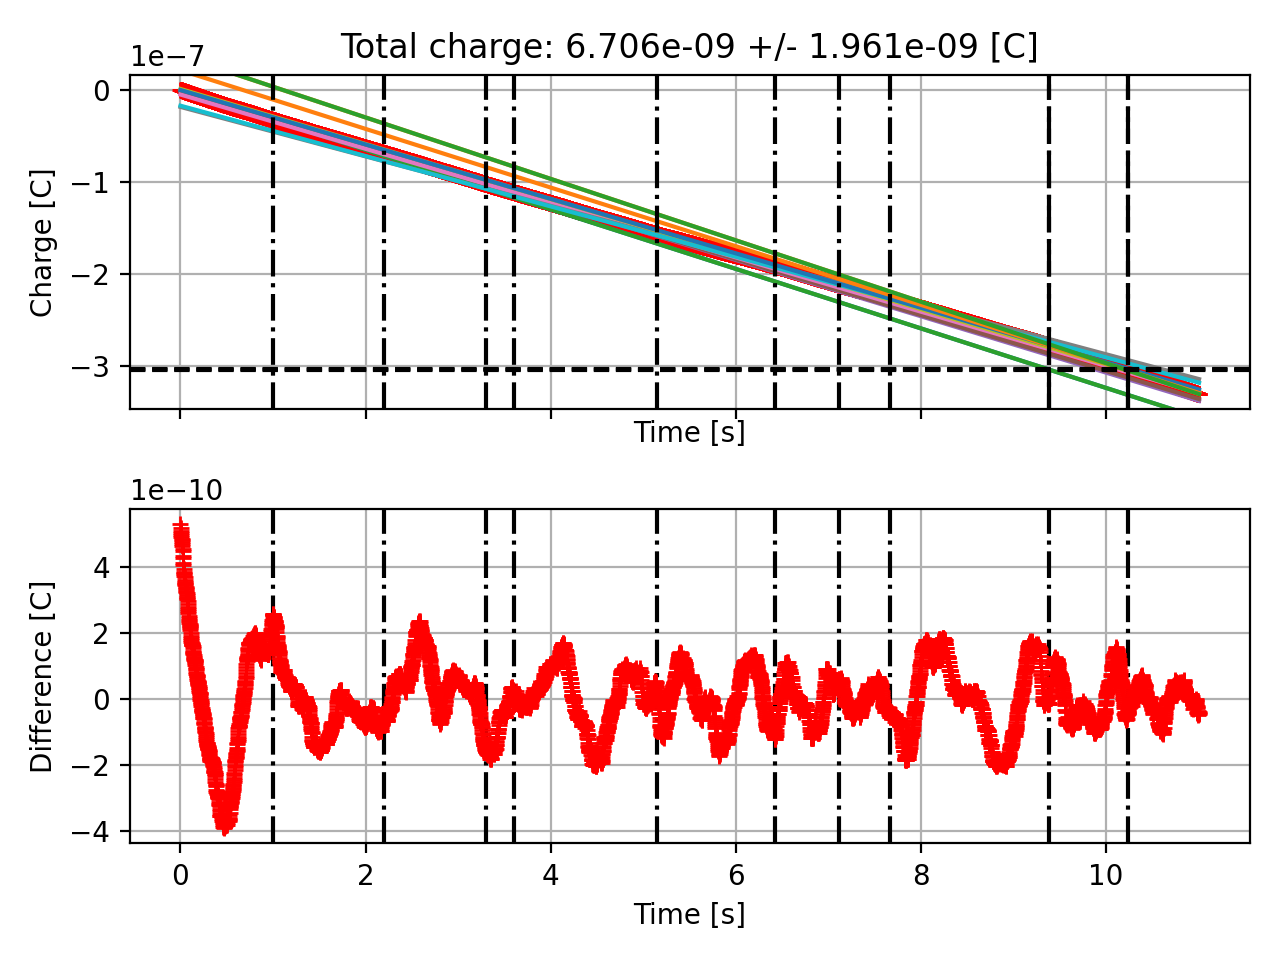

<IPython.core.display.Javascript object>


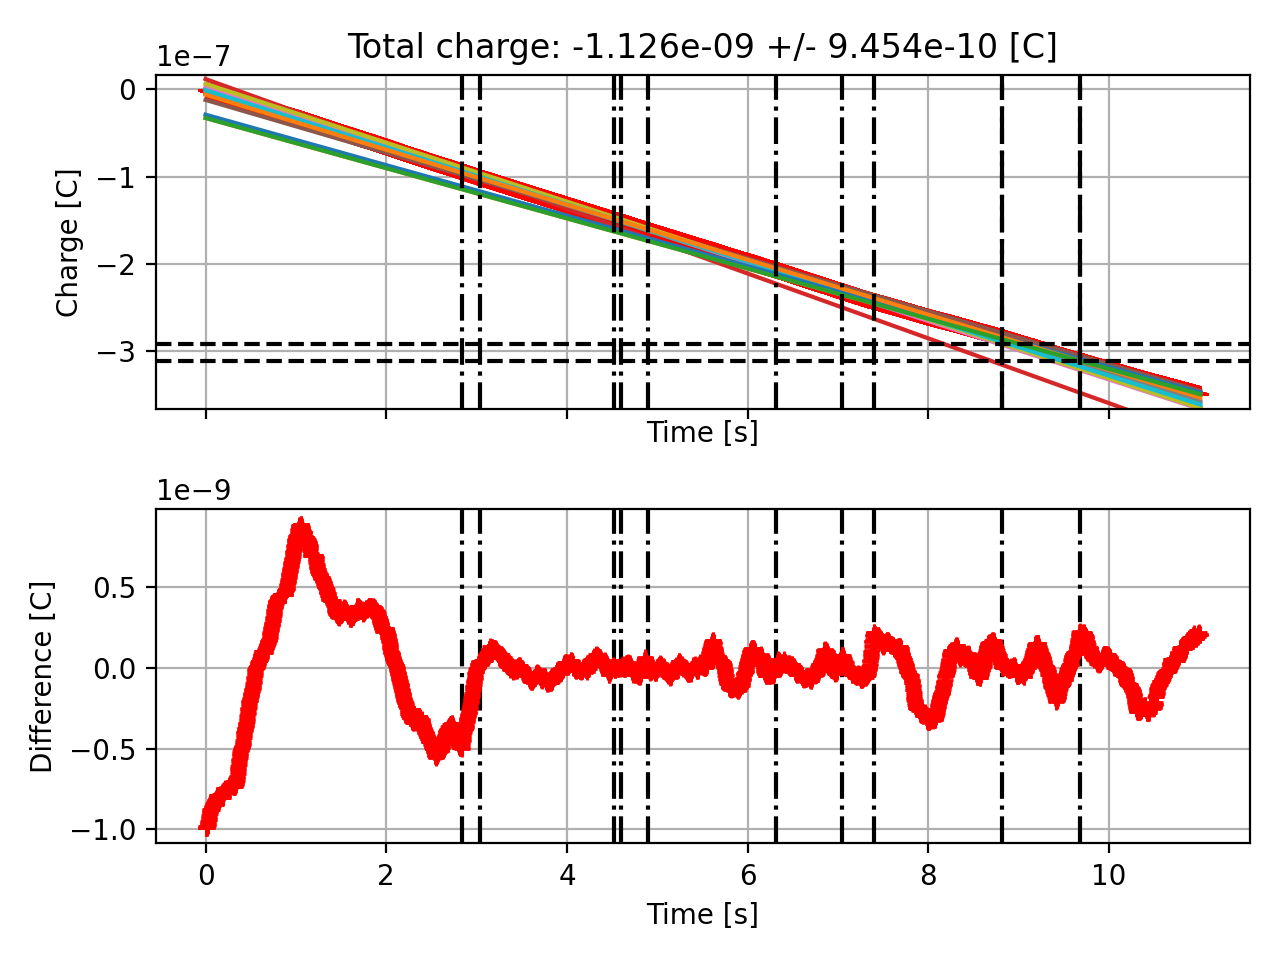

<IPython.core.display.Javascript object>


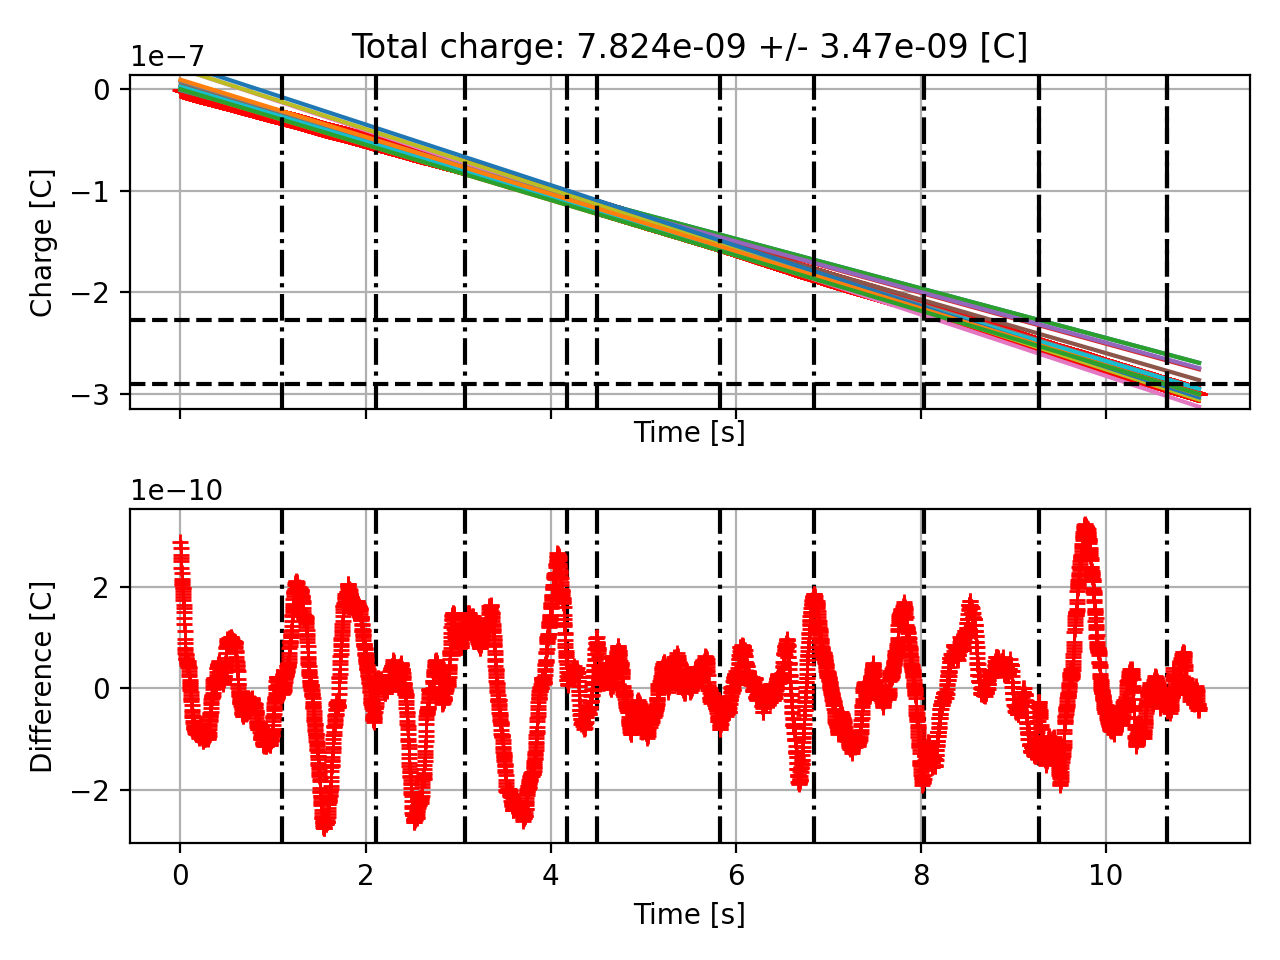

<IPython.core.display.Javascript object>


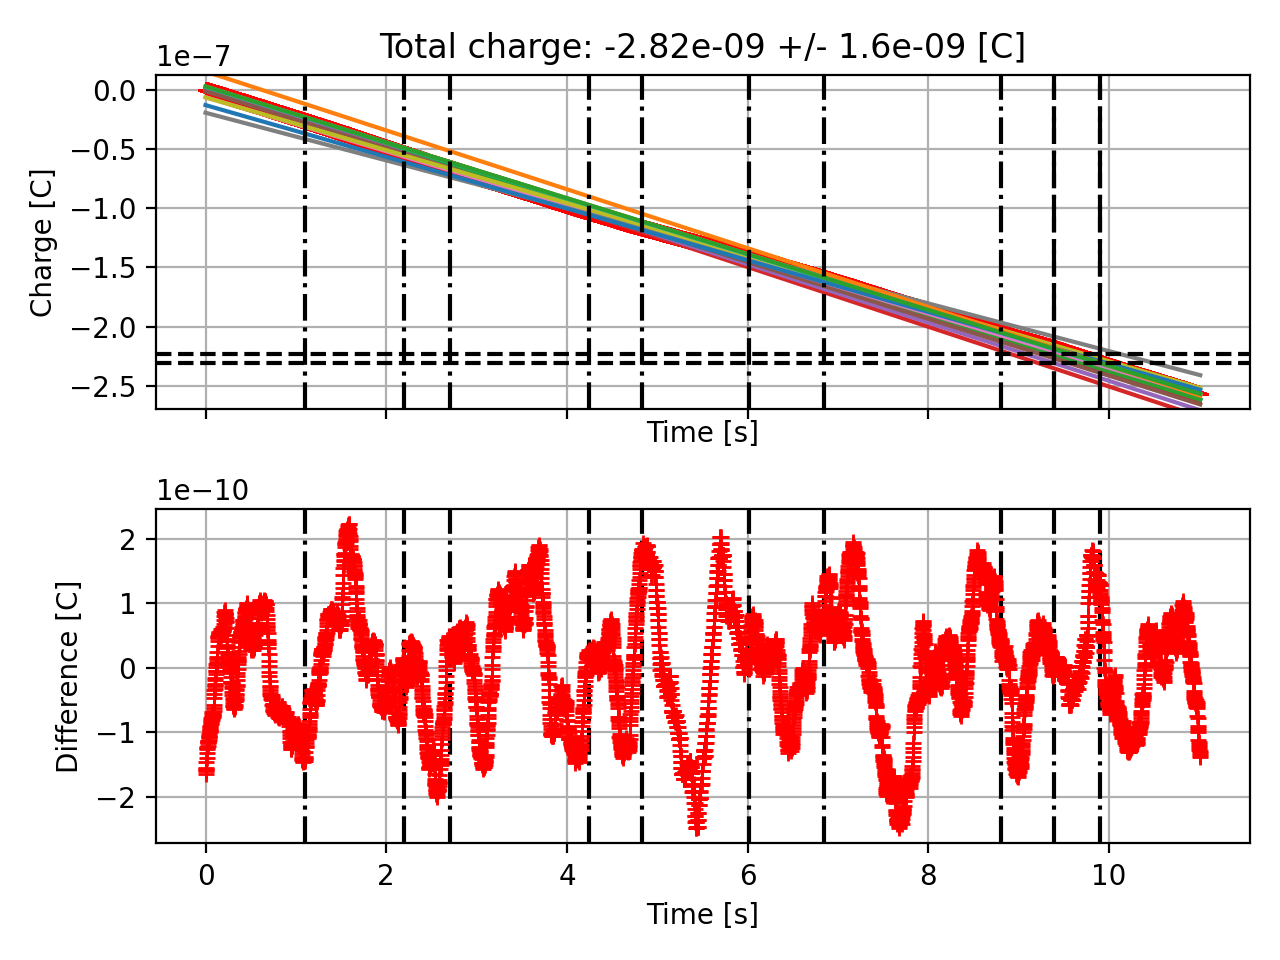

<IPython.core.display.Javascript object>


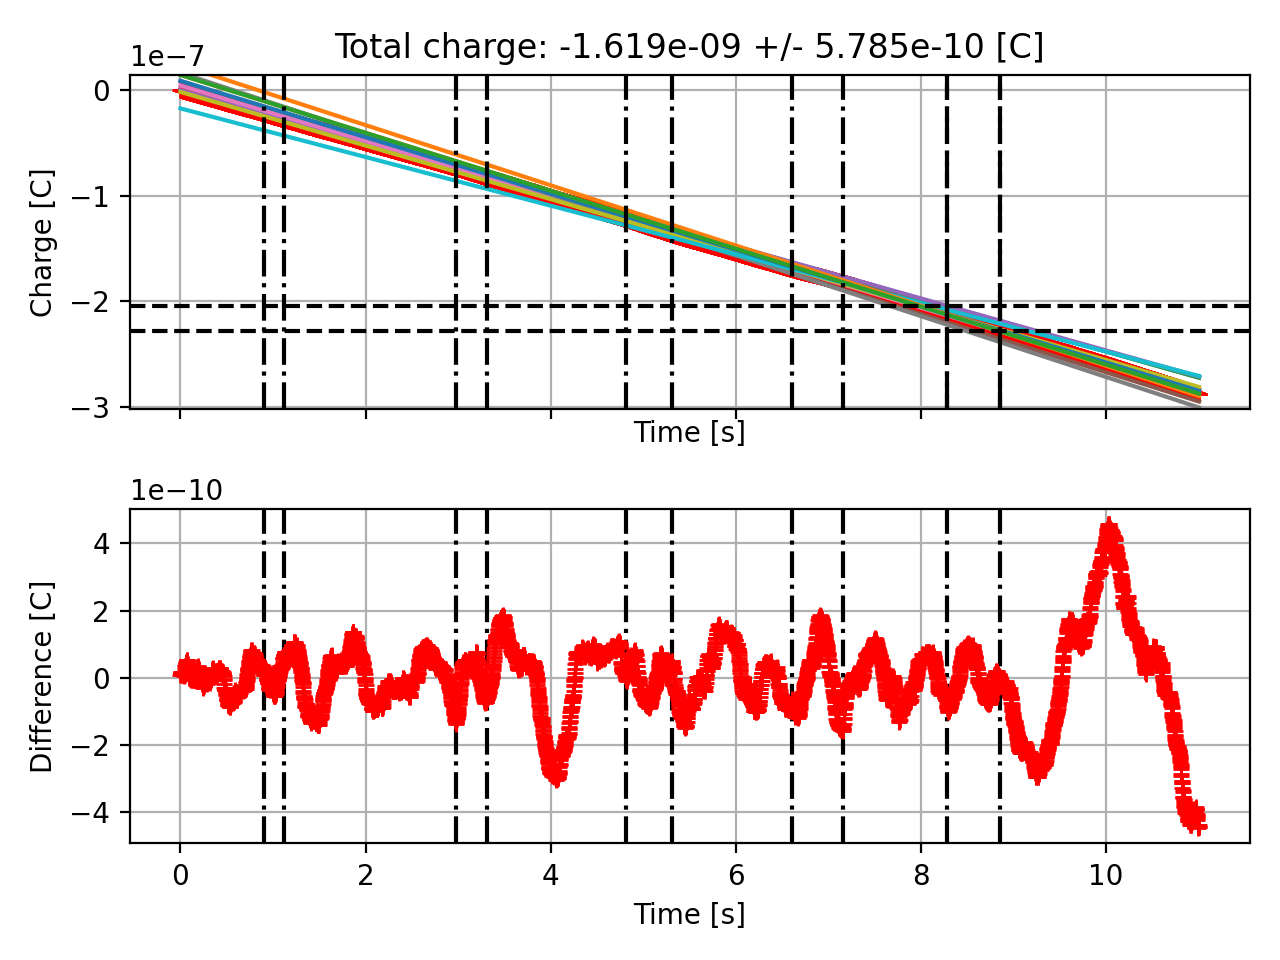

<IPython.core.display.Javascript object>


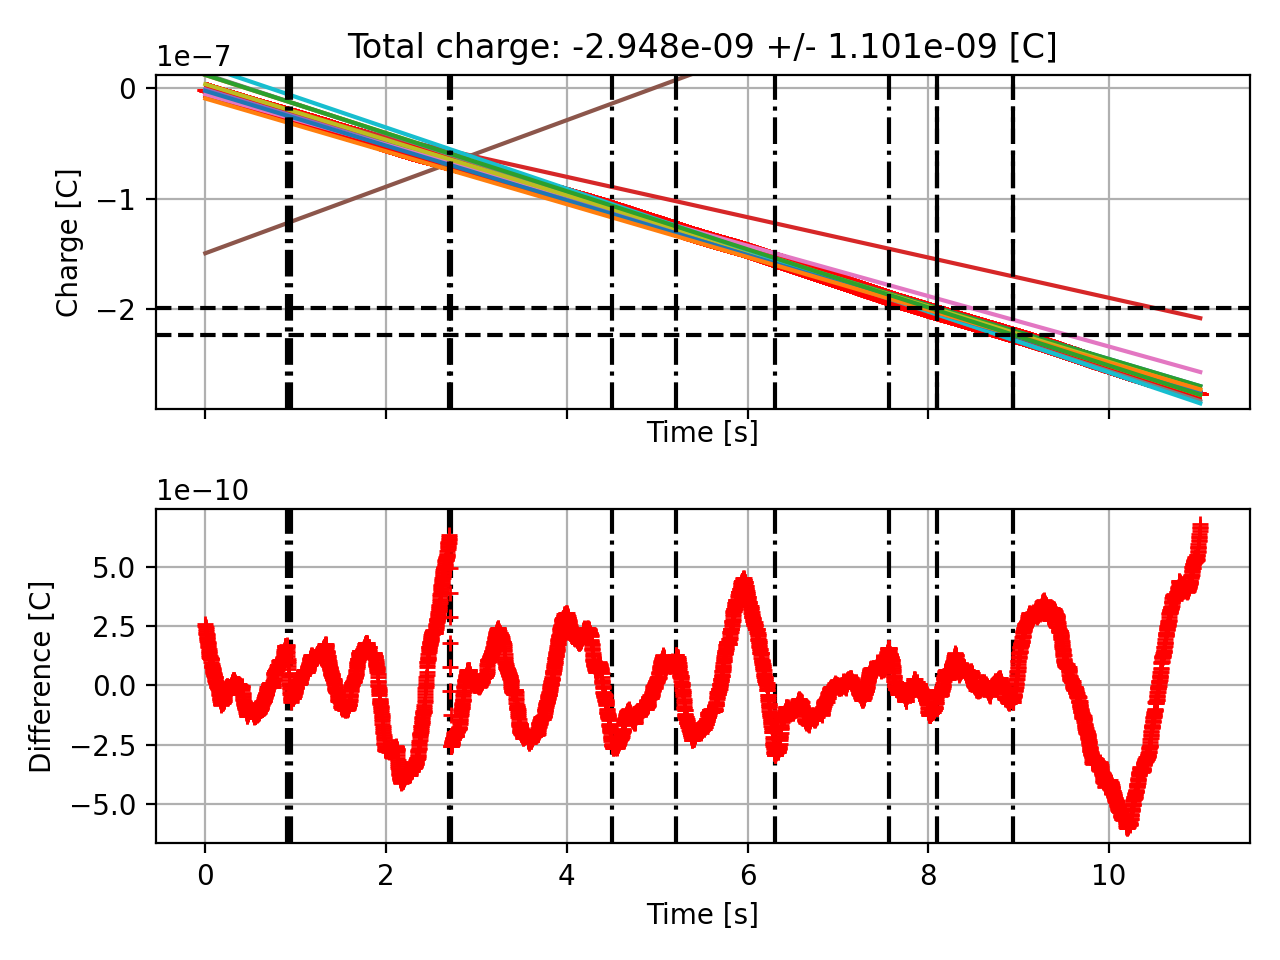

<IPython.core.display.Javascript object>


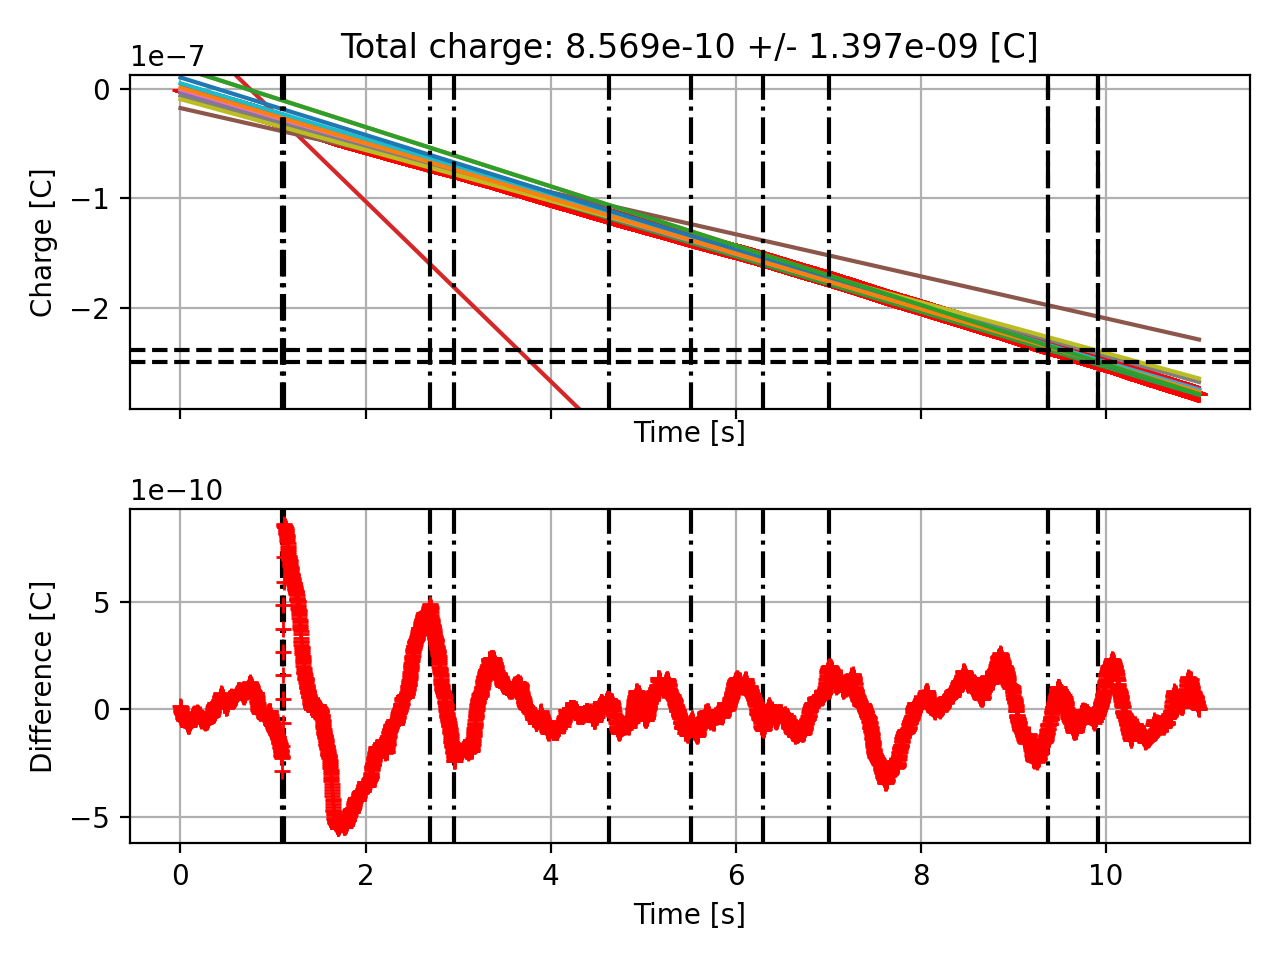

<IPython.core.display.Javascript object>


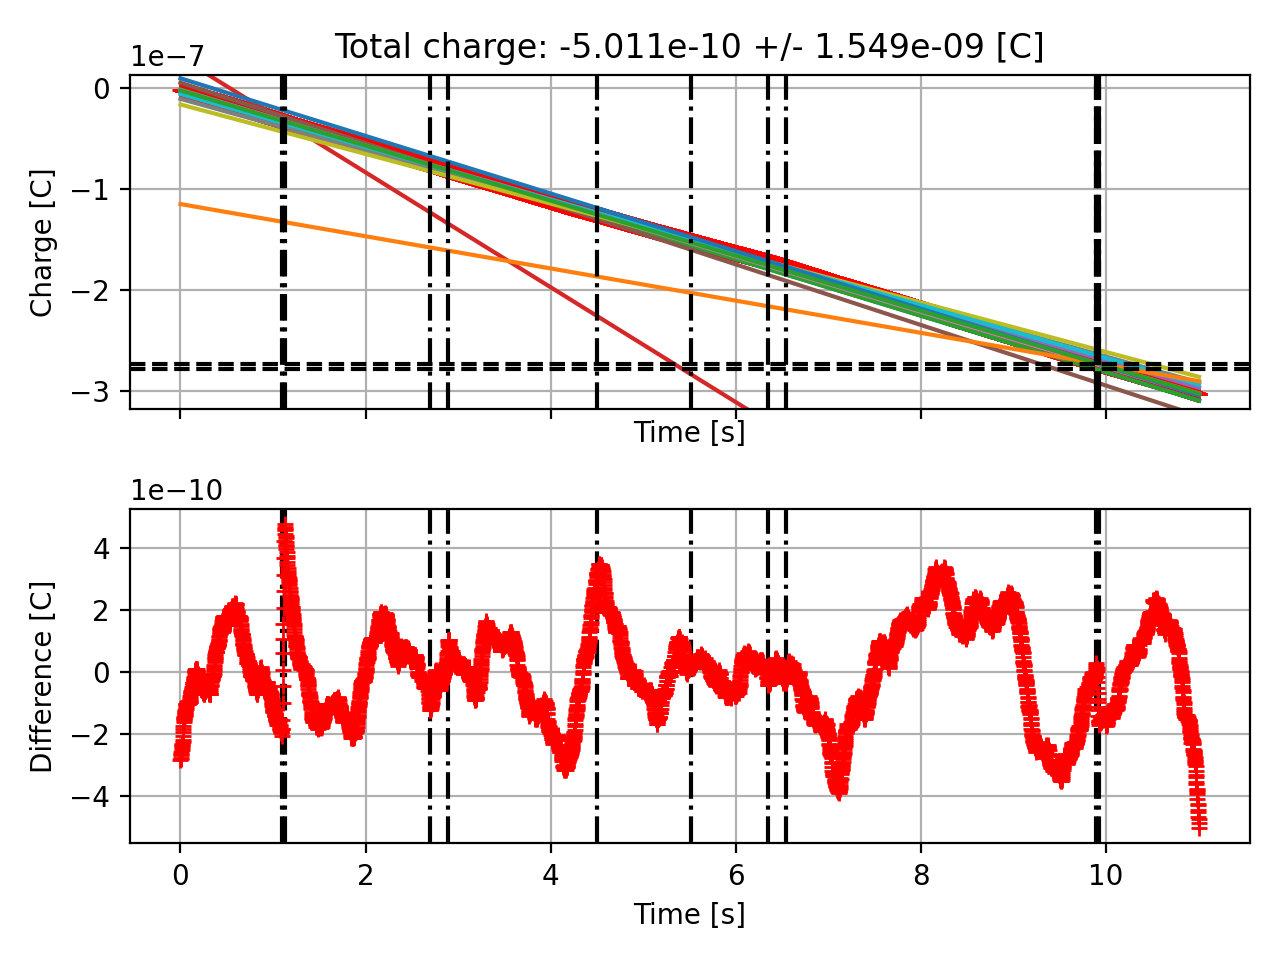

In [16]:
for d in run.data_sets:

    noise = estimate_noise(d.sc.data["time"], d.sc.data["charge"])
    err = noise * np.ones_like(d.sc.data["time"])
    charge_sc, charge_sc_err, i_k1, i_k2, pvals_sc, indices_sc = get_solarcell_total_charge(
        d.sc.data["time"], d.sc.data["charge"], d.get_time_breaks(), err=err, plot=True)
